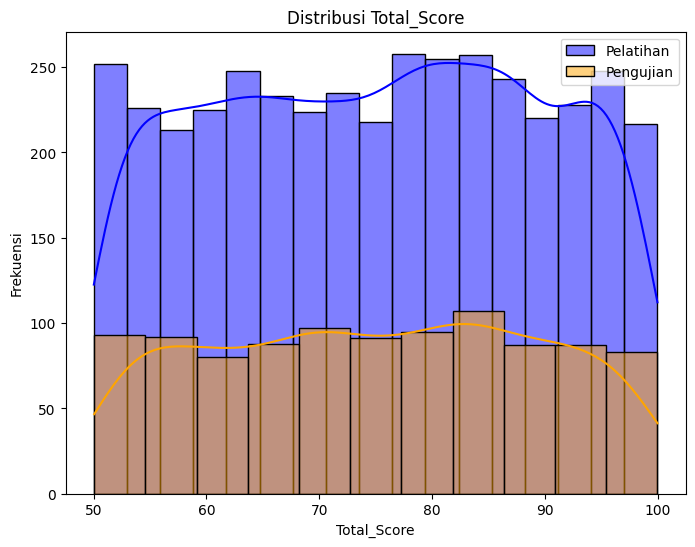

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

y_train = pd.read_csv("dataset/y_train.csv").values.ravel()
y_test = pd.read_csv("dataset/y_test.csv").values.ravel()
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True, color='blue', label='Pelatihan')
sns.histplot(y_test, kde=True, color='orange', label='Pengujian')
plt.title('Distribusi Total_Score')
plt.xlabel('Total_Score')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [2]:
X_train = pd.read_csv("dataset/X_train.csv")
print("Missing Values di X_train:\n", X_train.isnull().sum())

Missing Values di X_train:
 Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Study_Hours_per_Week          0
Sleep_Hours_per_Night         0
Extracurricular_Activities    0
Age                           0
Parent_Education_Level        0
Internet_Access_at_Home       0
Stress_Level (1-10)           0
Gender_Male                   0
Department_CS                 0
Department_Engineering        0
Department_Mathematics        0
Family_Income_Level_Low       0
Family_Income_Level_Medium    0
dtype: int64


In [3]:
from scipy import stats
import numpy as np

for column in X_train.select_dtypes(include=[np.number]).columns:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    X_train[column] = X_train[column].clip(lower_bound, upper_bound)
X_train.to_csv("X_train_revised.csv", index=False)